# Main-exp-1:
## 热力图

TODO: FF的所有组要剔除。目前还保留在图里，导致有0_0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the CSV files
ft_before_path = "../result/corrected_unlearn_acc_before.csv"
ft_after_path = "../result/corrected_lipnet_acc_after.csv"


# Load the data from the CSV files
ft_before_df = pd.read_csv(ft_before_path, converters={i: eval for i in range(1, 100)})
ft_after_df = pd.read_csv(ft_after_path, converters={i: eval for i in range(1, 100)})


# Ensure that all data are in dictionary format
def convert_to_dict(val):
    if isinstance(val, list) and all(v == 0 for v in val):
        return {"key_" + str(i): v for i, v in enumerate(val)}
    elif isinstance(val, dict):
        return val
    return {}


# Apply conversion to the entire dataframe
ft_before_df_corrected = ft_before_df.copy()
ft_after_df_corrected = ft_after_df.copy()

for i in range(1, ft_before_df_corrected.shape[1]):
    ft_before_df_corrected.iloc[:, i] = ft_before_df_corrected.iloc[:, i].apply(
        convert_to_dict
    )
    ft_after_df_corrected.iloc[:, i] = ft_after_df_corrected.iloc[:, i].apply(
        convert_to_dict
    )


# Function to map the data from unlearn to lipnet based on specific keys
def map_unlearn_to_lipnet(unlearn_data, lipnet_data):
    mapped_data = {}
    for key, value in unlearn_data.items():
        if key.startswith("forget "):
            label_num = key.split(" ")[1]
            mapped_key = f"forget_label_{label_num}"
            if mapped_key in lipnet_data:
                mapped_data[mapped_key] = (value, lipnet_data[mapped_key] * 100)
        elif key == "forget":
            mapped_data["forget_acc"] = (value, lipnet_data.get("forget_acc", 0) * 100)
        elif key == "test":
            mapped_data["test_acc"] = (value, lipnet_data.get("test_acc", 0) * 100)
    return mapped_data


# Filter out rows where the data is not in dictionary format
def is_valid_dict(val):
    return isinstance(val, dict)


filtered_df = ft_before_df_corrected.copy()
filtered_after_df = ft_after_df_corrected.copy()

for col in filtered_df.columns[1:]:
    filtered_df = filtered_df[filtered_df[col].apply(is_valid_dict)]
    filtered_after_df = filtered_after_df[filtered_after_df[col].apply(is_valid_dict)]

# Initialize a dictionary to store aggregated results with default values
aggregated_data = {}


# Function to aggregate data for a given dataset column with default handling
def aggregate_data_for_dataset(dataset_column):
    for method in filtered_df.iloc[:, 0].unique():
        before_row = filtered_df[filtered_df.iloc[:, 0] == method]
        after_row = filtered_after_df[filtered_after_df.iloc[:, 0] == method]

        if not before_row.empty:
            before_data = before_row.iloc[0][dataset_column]
        else:
            before_data = {}

        if not after_row.empty:
            after_data = after_row.iloc[0][dataset_column]
        else:
            after_data = {}

        mapped_data = map_unlearn_to_lipnet(before_data, after_data)

        for key, (before_val, after_val) in mapped_data.items():
            aggregated_data[(method, dataset_column, key)] = {
                "before": before_val,
                "after": after_val,
            }


# Aggregating data for all datasets
for dataset in filtered_df.columns[1:]:
    aggregate_data_for_dataset(dataset)

# Convert the aggregated data to a DataFrame
heatmap_data = pd.DataFrame.from_dict(aggregated_data, orient="index")

# Normalize the data for better heatmap visualization
heatmap_data_normalized = (heatmap_data - heatmap_data.min()) / (
    heatmap_data.max() - heatmap_data.min()
)

# Extract data for 'forget' key for heatmap visualization
forget_data = heatmap_data_normalized.xs("forget_acc", level=2, axis=0)

plt.style.use("default")
plt.figure(figsize=(14, 8))
sns.heatmap(
    forget_data, annot=True, cmap="coolwarm", cbar_kws={"label": "Normalized Value"}
)
plt.title("Heatmap of Forget Metric (Normalized) Across Methods and Datasets")
plt.xlabel("Data")
plt.ylabel("Method + Dataset")
plt.show()

KeyboardInterrupt: 

## 热力图（24-08-14）

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
flatten_df = pd.read_csv("../result/04-area_df.csv")
# aligned_df = pd.read_csv("../result/04-area_df.csv")
print(flatten_df.columns)
# aligned_df.head()
flatten_df


Index(['dataset', 'method', 'model_name', 'recall_acc_ul', 'recall_acc_lp',
       'test_acc_ul', 'test_acc_lp', 'forget_label_0_ul', 'forget_label_0_lp',
       'forget_label_1_ul', 'forget_label_1_lp', 'forget_label_3_ul',
       'forget_label_3_lp', 'forget_label_5_ul', 'forget_label_5_lp',
       'forget_label_6_ul', 'forget_label_6_lp', 'forget_label_11_ul',
       'forget_label_11_lp', 'forget_label_22_ul', 'forget_label_22_lp',
       'forget_label_33_ul', 'forget_label_33_lp', 'forget_label_44_ul',
       'forget_label_44_lp', 'forget_label_55_ul', 'forget_label_55_lp',
       'forget_label_51_ul', 'forget_label_51_lp', 'forget_label_101_ul',
       'forget_label_101_lp', 'forget_label_151_ul', 'forget_label_151_lp',
       'forget_label_198_ul', 'forget_label_198_lp', 'forget_label_7_ul',
       'forget_label_7_lp', 'forget_label_9_ul', 'forget_label_9_lp',
       'recall_diff', 'recall_improvement', 'recall_improvement_0',
       'recall_improvement_1', 'recall_improvement_3'

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,recall_improvement_51,recall_improvement_101,recall_improvement_151,recall_improvement_198,recall_improvement_7,recall_improvement_9,recall_improvement_sum,A_unlearn_acc,A_lipnet_acc,A_r
0,cifar10,retrain,resnet18,66.248889,69.404444,74.430000,99.660000,70.711111,76.222222,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,0.239716,13446.125435,14952.715062,0.112046
1,cifar10,FT,resnet18,66.871111,70.168889,74.870000,99.700000,72.355556,76.488889,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,0.247425,13785.169411,15238.769383,0.105447
2,cifar10,FF,resnet18,51.822222,95.662222,36.010000,99.500000,34.488889,91.066667,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,6.016778,6507.543689,27005.248395,3.149837
3,cifar10,GA,resnet18,76.337778,92.133333,66.630000,99.680000,78.800000,93.244444,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,1.037606,17673.075607,25568.764444,0.446764
4,cifar10,IU,resnet18,87.466667,97.075556,69.820000,99.690000,94.844444,98.444444,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,0.558074,23608.787137,28403.660247,0.203097
5,cifar10,FT_prune,resnet18,40.791111,54.008889,56.990000,99.380000,43.422222,63.866667,51.688889,...,NaN,NaN,NaN,NaN,NaN,NaN,1.609970,5082.988652,9387.610864,0.846868
6,cifar10,retrain,vgg16,77.662222,80.773333,84.610000,99.770000,81.066667,85.244444,89.244444,...,NaN,NaN,NaN,NaN,NaN,NaN,0.210224,18351.682053,19949.333333,0.087057
7,cifar10,FT,vgg16,79.804444,82.595556,85.320000,99.750000,81.911111,86.400000,90.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,0.180381,19258.052305,20790.937284,0.079597
8,cifar10,FF,vgg16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
9,cifar10,GA,vgg16,59.377778,82.382222,67.640000,99.760000,64.355556,87.511111,38.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,2.046351,10855.072608,20732.048395,0.909895


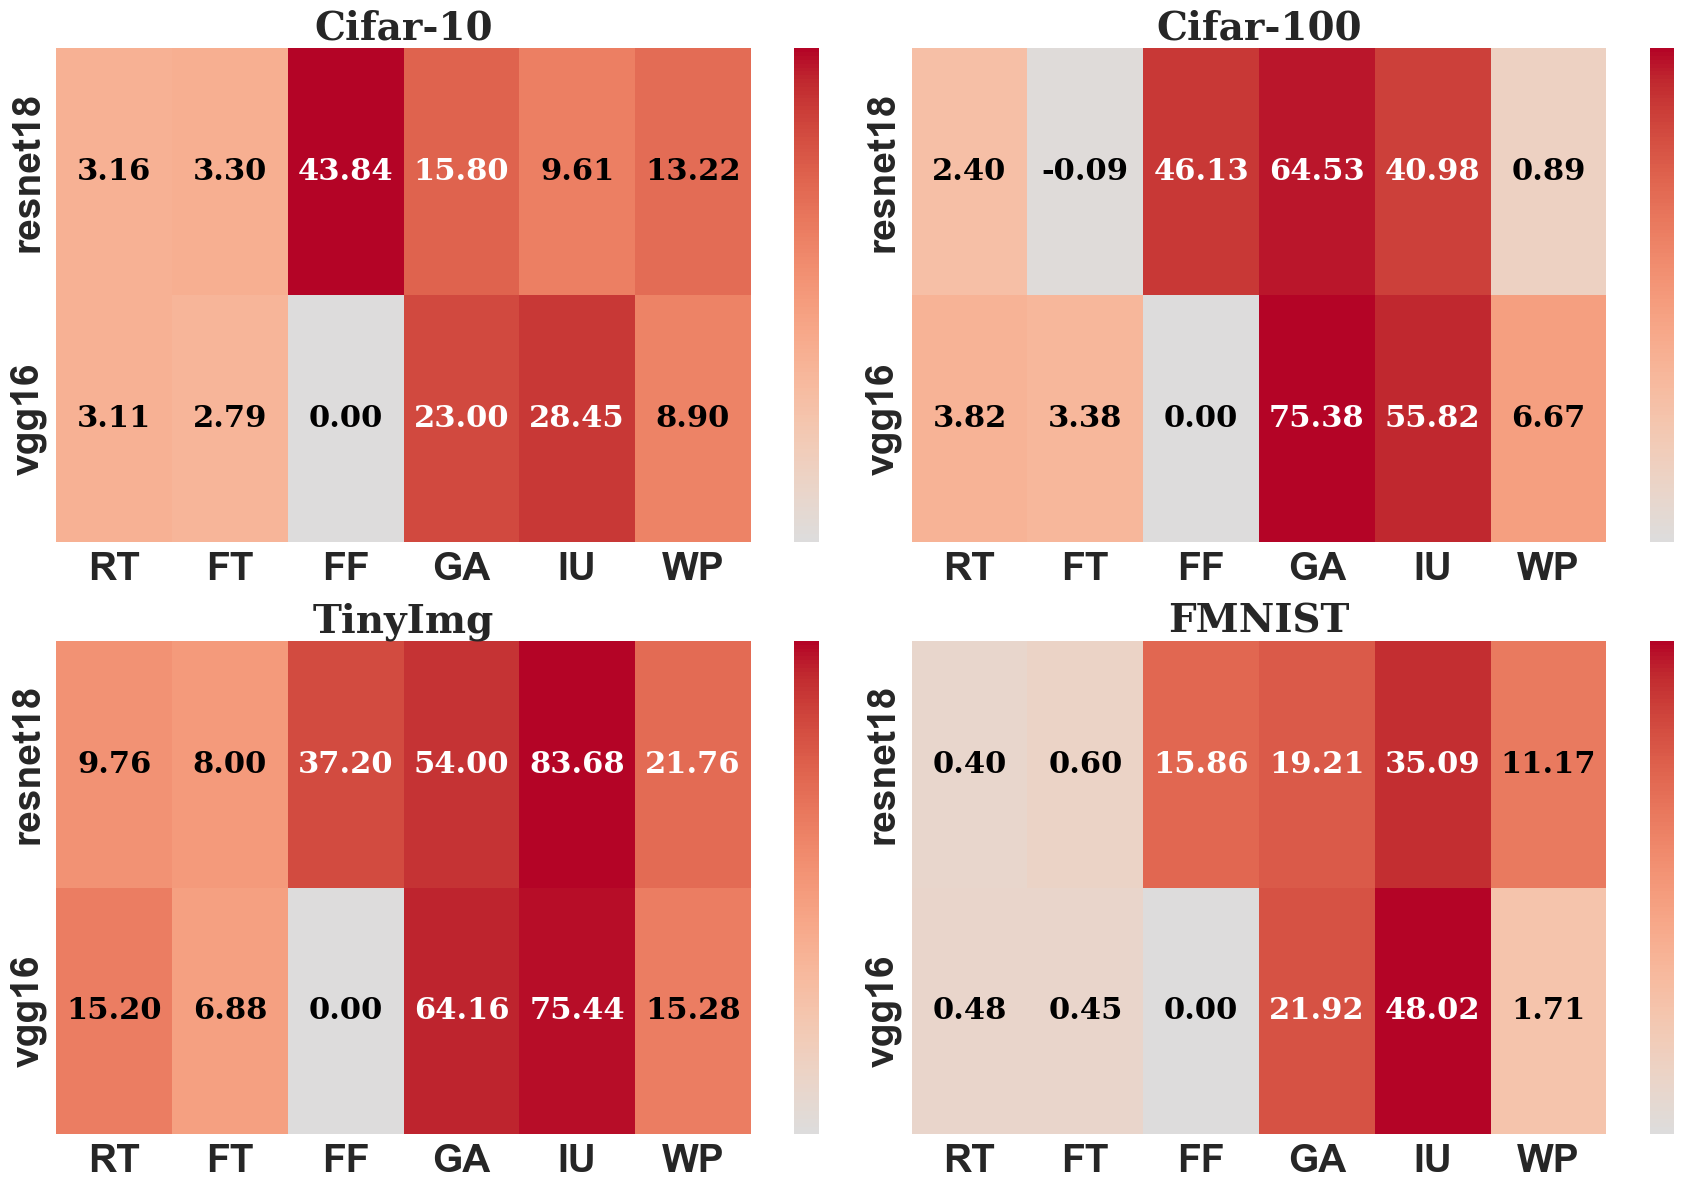

In [46]:
# Correcting the pivot operation with keyword arguments

# Load the flattened dataframe
# flatten_df = pd.read_csv("/mnt/data/02-flatten_df.csv")

# Create a new column for the difference between lipnet and unlearned recall accuracy
flatten_df['recall_diff'] = flatten_df['recall_acc_lp'] - flatten_df['recall_acc_ul']

# Split the dataframe by dataset
datasets = flatten_df['dataset'].unique()

# Adjust the heatmap plotting code to handle missing data by replacing NaNs with a specific marker

# Adjust the heatmap plotting code to handle missing data by replacing NaNs with a specific marker and color them differently

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Define a color for the "No Data" cells
no_data_color = "lightgrey"

dataset_display_names = {
    "cifar10": "Cifar-10",
    "cifar100": "Cifar-100",
    "tinyimg": "TinyImg",
    "fmnist": "FMNIST",
}

# Plot heatmaps for each dataset
for i, dataset in enumerate(datasets):
    dataset_df = flatten_df[flatten_df['dataset'] == dataset]
    
    # Pivot the dataframe to have models as rows and methods as columns
    heatmap_data = dataset_df.pivot(index="model_name", columns="method", values="recall_diff")
    
    # TODO: 24-08-14: Reformat the name and order for display
    
    heatmap_data.rename(columns={'FT_prune': 'WP', 'retrain': 'RT'}, inplace=True)
    heatmap_data = heatmap_data[['RT', 'FT', 'FF', 'GA', 'IU', 'WP']]
    
    # Replace NaN values with a specific marker value, e.g., np.nan to keep the cell blank or a specific low value
    mask = heatmap_data.isnull()
    
    log_data = np.log(heatmap_data.abs() + 1)
    
    vmin = log_data.min().min()
    vmax = log_data.max().max()
    k = 0.7
    # midpoint = (vmin + vmax) / 2
    midpoint = vmin + k * (vmax - vmin)

    heatmap = sns.heatmap(
        # heatmap_data,
        log_data,
        annot=heatmap_data,
        # annot=True,
        cmap="coolwarm",
        center=0,
        fmt=".2f",
        ax=axes[i],
        # cbar_kws={"label": "Recall Accuracy Difference (LP - UL)"},
        mask=mask,  # Use the mask to hide missing data
        cbar_kws={"ticks": []},
        # cbar_ax=fig.add_axes([0.93, 0.15, 0.02, 0.7]),  # Adjust the position of the colorbar
        annot_kws={"size": 22, "color": "black", "fontfamily": "serif", "weight": "bold"}  # Adjust the annotation style
    )
    
    # If the value larger than the midpoint, the heatmap color will be too deep, therefore change the text color to white.
    for text in heatmap.texts:
        # print(text.get_text())
        value = np.log(np.abs(float(text.get_text())) + 1)
        # print(f'Value {value}, midpoint {midpoint}')
        text.set_color('white' if value > midpoint else 'black')
    
    
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=28, weight='bold')
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=28, weight='bold')
    # Overlay text 'No Data' where there's missing data (NaN values)
    for (j, k), val in np.ndenumerate(heatmap_data.values):
        if np.isnan(val):
            # Color the cell with a specific color
            axes[i].add_patch(plt.Rectangle((k, j), 1, 1, color=no_data_color, ec='white'))
            axes[i].text(k + 0.5, j + 0.5, 'No Data', ha='center', va='center', color='black', fontsize=10)
    
    # axes[i].set_title(f"Dataset: {dataset}")
    # axes[i].set_title(f"{dataset}")
    axes[i].set_title(dataset_display_names[dataset], fontfamily= 'serif', fontsize=28, weight='bold')
    # axes[i].set_ylabel("Model Name")
    # axes[i].set_xlabel("Method")

# Adjust layout and add a main title
plt.tight_layout()
# plt.suptitle("Heatmaps of Recall Accuracy Differences Across Datasets", fontsize=16, y=1.02)
plt.show()

# Main-exp-2

## 单unlearn方法的雷达图

> GA的数据，包括了ResNet和VGG的结果

In [1]:
# Load the dataframe (Aligned_df)

import pandas as pd
aligned_df = pd.read_csv("../result/01-aligned_df.csv")
# aligned_df = pd.read_csv("../result/04-area_df.csv")
print(aligned_df.columns)
# aligned_df.head()
aligned_df

Index(['dataset', 'method', 'model_name', 'recall_acc', 'test_acc',
       'forget_label_0', 'forget_label_1', 'forget_label_3', 'forget_label_5',
       'forget_label_6', 'forget_label_11', 'forget_label_22',
       'forget_label_33', 'forget_label_44', 'forget_label_55',
       'forget_label_51', 'forget_label_101', 'forget_label_151',
       'forget_label_198', 'forget_label_7', 'forget_label_9'],
      dtype='object')


,dataset,method,model_name,recall_acc,test_acc,forget_label_0,forget_label_1,forget_label_3,forget_label_5,forget_label_6,...,forget_label_22,forget_label_33,forget_label_44,forget_label_55,forget_label_51,forget_label_101,forget_label_151,forget_label_198,forget_label_7,forget_label_9
0,cifar10,retrain,resnet18,"(66.24888899197049, 69.40444444444445)","(74.43, 99.66000000000001)","(70.71111092122396, 76.22222222222223)","(79.06666692437067, 81.73333333333333)","(48.577777777777776, 50.93333333333333)","(57.11111123657226, 59.51111111111111)","(75.77777789984809, 78.62222222222222)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cifar10,FT,resnet18,"(66.87111105821397, 70.16888888888889)","(74.87, 99.7)","(72.35555576578776, 76.48888888888888)","(80.57777761501737, 83.28888888888889)","(49.37777777777778, 52.93333333333333)","(55.95555543687608, 56.93333333333334)","(76.08888909912109, 81.2)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cifar10,FF,resnet18,"(51.82222220594618, 95.66222222222223)","(36.01, 99.5)","(34.488888793945314, 91.06666666666666)","(99.91111111111111, 99.95555555555555)","(33.42222213745117, 93.42222222222222)","(33.15555550130208, 96.13333333333334)","(58.13333344862196, 97.73333333333333)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cifar10,GA,resnet18,"(76.33777779541016, 92.13333333333334)","(66.63, 99.68)","(78.8000002983941, 93.24444444444444)","(75.64444430202909, 92.13333333333334)","(73.28888894314237, 91.86666666666666)","(77.15555550130209, 91.24444444444444)","(76.8000002102322, 92.17777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cifar10,IU,resnet18,"(87.46666674669054, 97.07555555555555)","(69.82, 99.69)","(94.84444422064887, 98.44444444444444)","(86.75555537245009, 96.31111111111112)","(85.82222219509549, 96.84444444444445)","(86.62222245958117, 97.46666666666667)","(83.288889058431, 96.31111111111112)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cifar10,FT_prune,resnet18,"(40.791111117214626, 54.00888888888888)","(56.99, 99.38)","(43.42222233072917, 63.866666666666674)","(51.68888879055447, 66.48888888888888)","(36.48888898044162, 38.44444444444444)","(24.844444390190972, 34.8)","(47.511111189100475, 66.44444444444444)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cifar10,retrain,vgg16,"(77.6622222290039, 80.77333333333333)","(84.61, 99.77000000000001)","(81.06666701253255, 85.24444444444444)","(89.24444432915581, 90.75555555555556)","(65.95555573866102, 70.22222222222221)","(66.80000009494357, 70.31111111111112)","(85.24444452582465, 87.33333333333333)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cifar10,FT,vgg16,"(79.8044444539388, 82.59555555555555)","(85.32, 99.75)","(81.91111110432942, 86.4)","(90.31111123996311, 91.28888888888889)","(69.5555553656684, 73.42222222222222)","(71.59999972195095, 73.86666666666667)","(85.64444428168403, 88.0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cifar10,FF,vgg16,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cifar10,GA,vgg16,"(59.37777781032986, 82.38222222222223)","(67.64, 99.76)","(64.35555558268229, 87.5111111111111)","(38.31111126030816, 61.6)","(61.06666663614909, 86.93333333333332)","(60.22222233751085, 84.22222222222221)","(72.93333327907986, 91.64444444444445)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


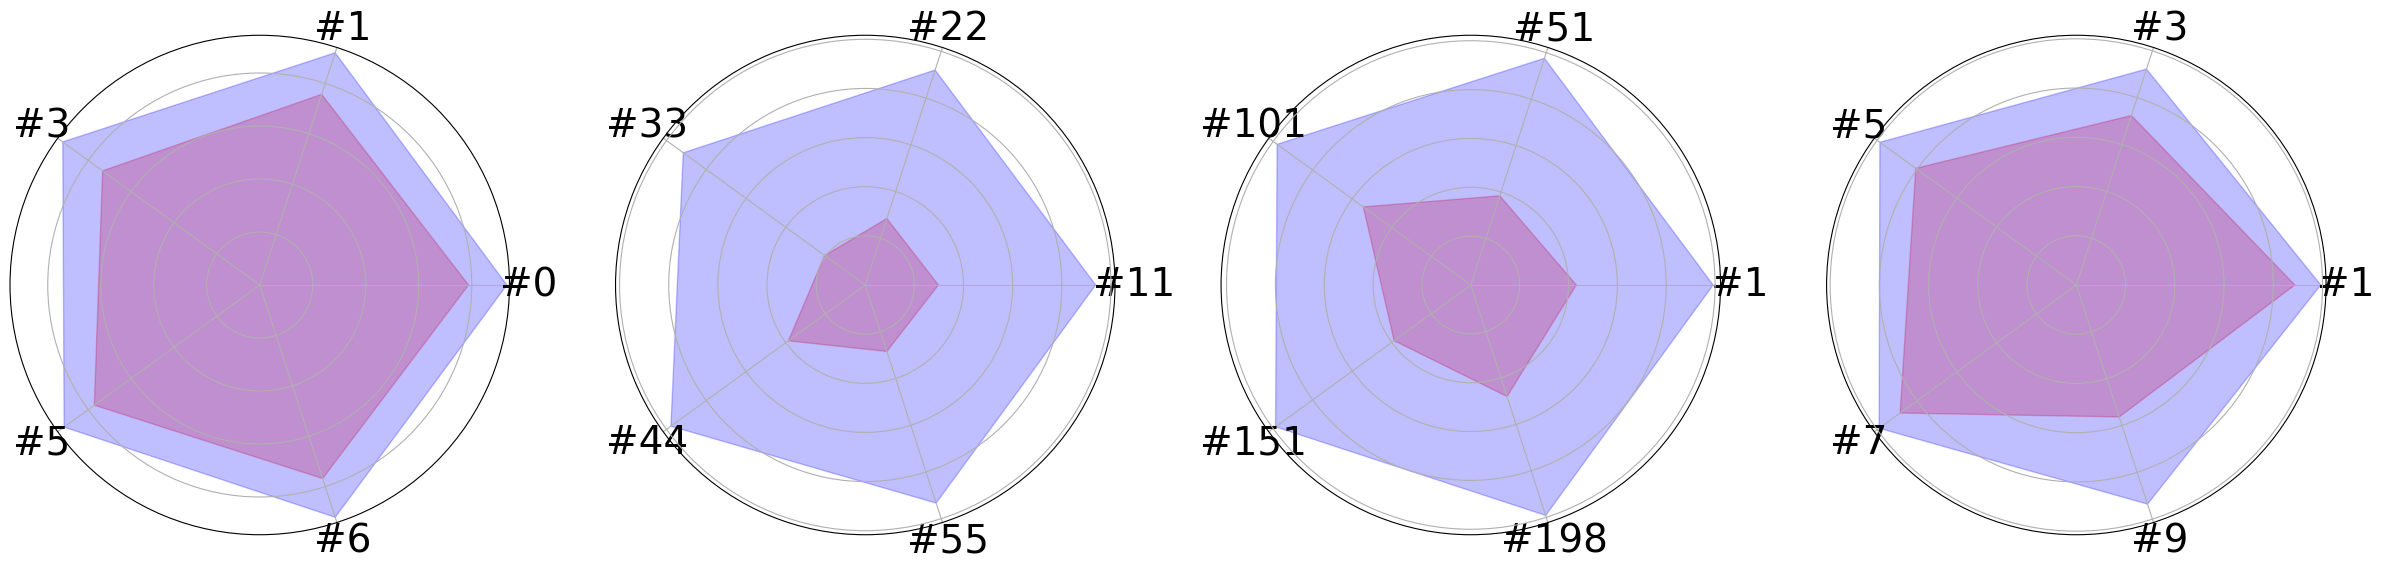

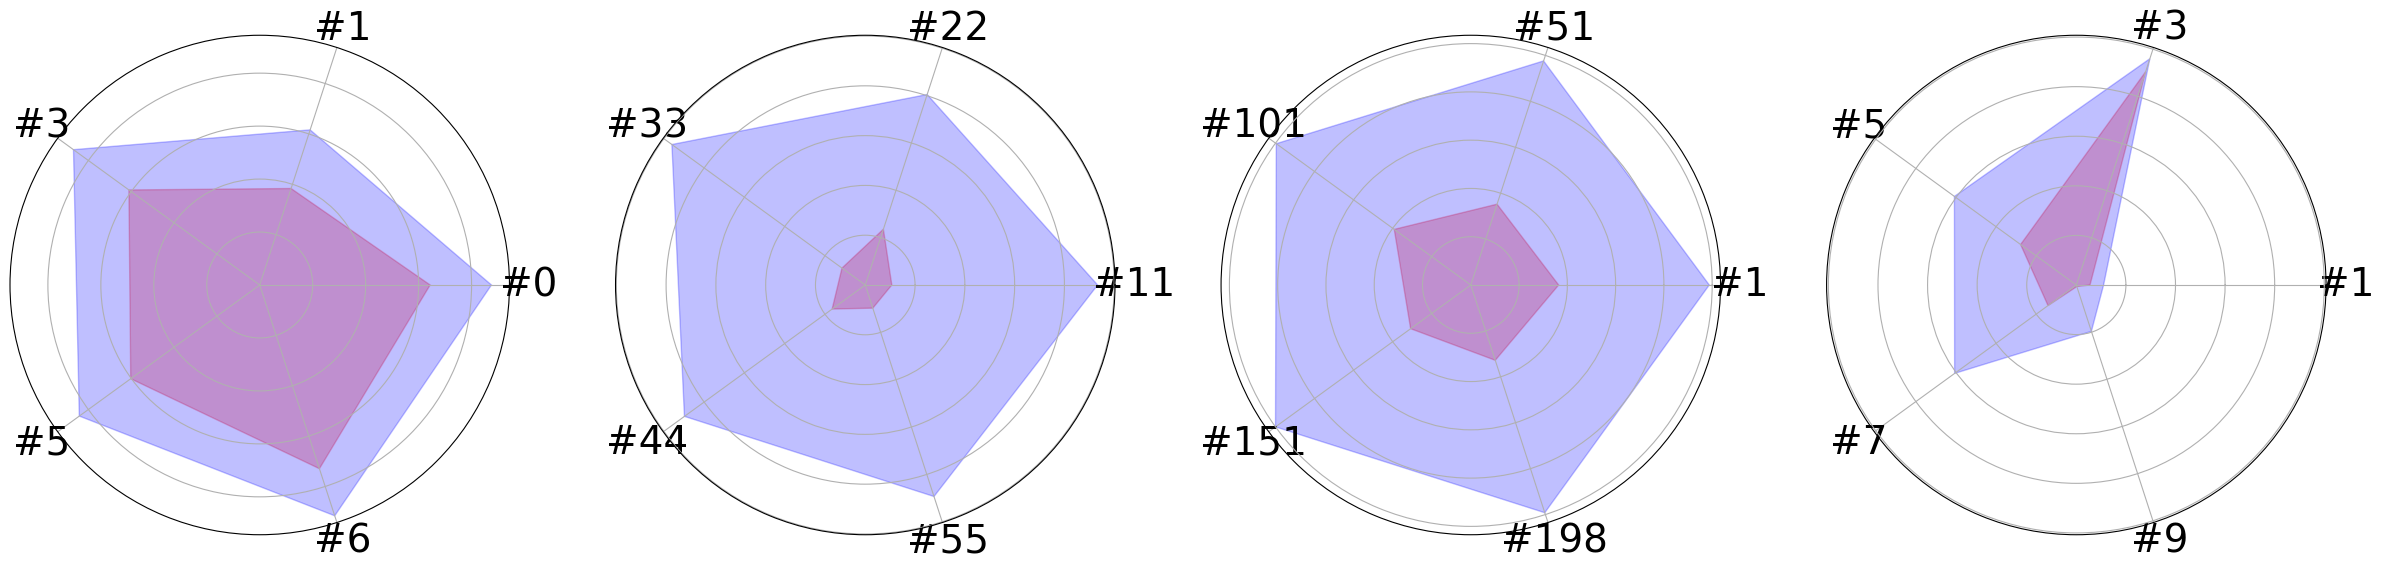

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the forget labels for each dataset
forget_labels = {
    "cifar10": [
        "forget_label_0",
        "forget_label_1",
        "forget_label_3",
        "forget_label_4",
        "forget_label_5",
        "forget_label_6",
    ],
    "cifar100": [
        "forget_label_11",
        "forget_label_22",
        "forget_label_33",
        "forget_label_44",
        "forget_label_55",
    ],
    "tinyimg": [
        "forget_label_1",
        "forget_label_51",
        "forget_label_101",
        "forget_label_151",
        "forget_label_198",
    ],
    "fmnist": [
        "forget_label_1",
        "forget_label_3",
        "forget_label_5",
        "forget_label_7",
        "forget_label_9",
    ],
}


# Function to plot radar chart based on varying datasets
def plot_radar_charts_varying_datasets(aligned_df):
    models = aligned_df["model_name"].unique()
    methods = aligned_df["method"].unique()
    datasets = aligned_df["dataset"].unique()

    for model_name in models:
        for mu_method in methods:
            if mu_method != 'GA':
                continue
            num_datasets = len(datasets)
            num_cols = 4  # Set number of columns to 4
            num_rows = (num_datasets + num_cols - 1) // num_cols

            plt.style.use("default")

            fig, axes = plt.subplots(
                num_rows,
                num_cols,
                figsize=(num_cols * 6, num_rows * 6),
                subplot_kw=dict(polar=True),
            )

            for i, dataset in enumerate(datasets):
                row = i // num_cols
                col = i % num_cols
                ax = axes[row, col] if num_rows > 1 else axes[col]

                data = aligned_df[
                    (aligned_df["dataset"] == dataset)
                    & (aligned_df["model_name"] == model_name)
                    & (aligned_df["method"] == mu_method)
                ]
                if not data.empty:
                    unlearn_metrics = []
                    lipnet_metrics = []
                    labels = []

                    for col_name in forget_labels.get(dataset, []):
                        if col_name in data.columns:
                            value = data[col_name].iloc[0]
                            # if isinstance(value, tuple) and len(value) == 2:
                            #     unlearn_value, lipnet_value = value
                            # TODO: 24-08-13 Modified, here the value is '(un,lip)', which is a str but not tuple
                            value = eval(value)
                            if isinstance(value, tuple) and len(value) == 2:
                                unlearn_value, lipnet_value = value
                            else:
                                continue

                            labels.append(col_name)
                            unlearn_metrics.append(unlearn_value)
                            lipnet_metrics.append(lipnet_value)

                    if labels:
                        num_vars = len(labels)
                        angles = np.linspace(
                            0, 2 * np.pi, num_vars, endpoint=False
                        ).tolist()
                        unlearn_metrics += unlearn_metrics[:1]
                        lipnet_metrics += lipnet_metrics[:1]
                        angles += angles[:1]

                        ax.fill(angles, unlearn_metrics, color="red", alpha=0.25)
                        ax.fill(angles, lipnet_metrics, color="blue", alpha=0.25)
                        ax.set_yticklabels([])
                        ax.set_xticks(angles[:-1])
                        
                        # TODO: 24-08-13 Modified, Transform the label here
                        label_number = [int(label.split('_')[-1]) for label in labels]
                        # display_labels = [f'Label #{label_number[i]}' for i in range(len(label_number))]
                        display_labels = [f'#{label_number[i]}' for i in range(len(label_number))]
                        
                        # ax.set_xticklabels(labels)
                        ax.set_xticklabels(display_labels, fontsize=28)
                        # ax.set_title(
                        #     f"{dataset} - {model_name} - {mu_method}",
                        #     size=15,
                        #     color="blue",
                        #     y=1.1,
                        # )

            for j in range(i + 1, num_rows * num_cols):
                if num_rows > 1:
                    fig.delaxes(axes.flatten()[j])
                else:
                    fig.delaxes(axes[j])

            plt.tight_layout()
            plt.show()


# Example usage for varying datasets, models, and methods
plot_radar_charts_varying_datasets(aligned_df)

# Ablation-Study

## 整理结果


### Setting: P (Pretrain only)

In [3]:
import pandas as pd
import ast

# Load the data from the provided CSV files
# unlearn_acc_df = pd.read_csv("../result/corrected_unlearn_acc_0801.csv").rename(
unlearn_acc_df = pd.read_csv("../result/corrected_unlearn_acc_before.csv").rename(
    columns={"Unnamed: 0": "method"}
)
# lipnet_acc_df = pd.read_csv("../result/corrected_lipnet_acc_0801.csv").rename(
# lipnet_acc_df = pd.read_csv("../result/corrected_lipnet_acc_after.csv").rename(
lipnet_acc_df = pd.read_csv("../result/corrected_lipnet_acc_before.csv").rename(
    columns={"Unnamed: 0": "method"}
)


# Function to extract and map data from unlearn and lipnet datasets based on the given dataset and model
def extract_and_map_data(unlearn_df, lipnet_df):
    mapped_data = {}
    for index, row in unlearn_df.iterrows():
        method = row["method"]
        for model in row.index:
            if model != "method":
                unlearn_metrics = ast.literal_eval(row[model])
                lipnet_metrics = ast.literal_eval(lipnet_df.iloc[index][model])
                if model not in mapped_data:
                    mapped_data[model] = {}
                if method not in mapped_data[model]:
                    mapped_data[model][method] = {}

                # Mapping the keys from unlearn to lipnet, excluding 'test' and 'test_acc'
                for key, value in unlearn_metrics.items():
                    if key.startswith("forget "):
                        label_num = key.split(" ")[1]
                        mapped_key = f"forget_label_{label_num}"
                        if mapped_key in lipnet_metrics:
                            mapped_data[model][method][mapped_key] = (
                                value,
                                lipnet_metrics[mapped_key] * 100,
                            )
                    elif key == "forget":
                        mapped_data[model][method]["forget_acc"] = (
                            value,
                            lipnet_metrics.get("forget_acc", 0) * 100,
                        )
                    elif key == "test":
                        mapped_data[model][method]["test_acc"] = (
                            value,
                            lipnet_metrics.get("test_acc", 0) * 100,
                        )

    return mapped_data


# Extract and map data
mapped_data = extract_and_map_data(unlearn_acc_df, lipnet_acc_df)

# Converting the mapped data back to DataFrame format
aligned_df = pd.DataFrame.from_dict(
    {
        (i, j): mapped_data[i][j]
        for i in mapped_data.keys()
        for j in mapped_data[i].keys()
    },
    orient="index",
)

aligned_df.reset_index(inplace=True)
aligned_df.rename(columns={"level_0": "model", "level_1": "method"}, inplace=True)

# Split the 'model' column into 'dataset' and 'model_name'
aligned_df[["dataset", "model_name"]] = aligned_df["model"].str.split("_", expand=True)
aligned_df.drop(columns=["model"], inplace=True)

# Reorder columns
column_order = ["dataset", "method", "model_name"] + [
    col for col in aligned_df.columns if col not in ["dataset", "method", "model_name"]
]
aligned_df = aligned_df[column_order]

# Rname 'forget_acc' to 'recall_acc'
aligned_df.rename(columns={"forget_acc": "recall_acc"}, inplace=True)

# Replace empty cells with NaN
aligned_df = aligned_df.applymap(lambda x: x if x != "" else float("nan"))

# Save the final aligned dataframe to CSV
# aligned_df.to_csv("../result/01-aligned_df.csv", index=False)
aligned_df.to_csv("../result/ablations/P/01-aligned_df.csv", index=False)

print(aligned_df.columns)

aligned_df.head()

Index(['dataset', 'method', 'model_name', 'recall_acc', 'test_acc',
       'forget_label_0', 'forget_label_1', 'forget_label_3', 'forget_label_5',
       'forget_label_6', 'forget_label_11', 'forget_label_22',
       'forget_label_33', 'forget_label_44', 'forget_label_55',
       'forget_label_51', 'forget_label_101', 'forget_label_151',
       'forget_label_198', 'forget_label_7', 'forget_label_9'],
      dtype='object')


C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\11545583.py:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aligned_df = aligned_df.applymap(lambda x: x if x != "" else float("nan"))


,dataset,method,model_name,recall_acc,test_acc,forget_label_0,forget_label_1,forget_label_3,forget_label_5,forget_label_6,...,forget_label_22,forget_label_33,forget_label_44,forget_label_55,forget_label_51,forget_label_101,forget_label_151,forget_label_198,forget_label_7,forget_label_9
0,cifar10,retrain,resnet18,"(66.24888899197049, 57.49333333333333)","(74.43, 100.0)","(70.71111092122396, 67.06666666666666)","(79.06666692437067, 70.31111111111112)","(48.577777777777776, 37.733333333333334)","(57.11111123657226, 44.977777777777774)","(75.77777789984809, 67.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cifar10,FT,resnet18,"(66.87111105821397, 57.49333333333333)","(74.87, 100.0)","(72.35555576578776, 67.06666666666666)","(80.57777761501737, 70.31111111111112)","(49.37777777777778, 37.733333333333334)","(55.95555543687608, 44.977777777777774)","(76.08888909912109, 67.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cifar10,FF,resnet18,"(51.82222220594618, 57.49333333333333)","(36.01, 100.0)","(34.488888793945314, 67.06666666666666)","(99.91111111111111, 70.31111111111112)","(33.42222213745117, 37.733333333333334)","(33.15555550130208, 44.977777777777774)","(58.13333344862196, 67.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cifar10,GA,resnet18,"(76.33777779541016, 57.49333333333333)","(66.63, 100.0)","(78.8000002983941, 67.06666666666666)","(75.64444430202909, 70.31111111111112)","(73.28888894314237, 37.733333333333334)","(77.15555550130209, 44.977777777777774)","(76.8000002102322, 67.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cifar10,IU,resnet18,"(87.46666674669054, 57.49333333333333)","(69.82, 100.0)","(94.84444422064887, 67.06666666666666)","(86.75555537245009, 70.31111111111112)","(85.82222219509549, 37.733333333333334)","(86.62222245958117, 44.977777777777774)","(83.288889058431, 67.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Function to split the columns with tuple values into two separate columns
def find_and_split_columns(df):
    # Identify columns with tuple values
    columns_to_split = [
        col
        for col in df.columns
        if df[col].apply(lambda x: isinstance(x, tuple)).any()
    ]
    for col in columns_to_split:
        # Handle NaN values by converting them to a tuple of NaNs
        df[col] = df[col].apply(lambda x: (float("nan"), float("nan")) if pd.isna(x) else x)
        
        # Split the tuple values into two separate columns
        df[[f"{col}_ul", f"{col}_lp"]] = pd.DataFrame(df[col].tolist(), index=df.index)
        
        # Drop the original column
        df.drop(columns=[col], inplace=True)
    return df


# Apply the function to the aligned_df dataframe
flatten_df = find_and_split_columns(aligned_df)

# # Save the final aligned and split dataframe to CSV
output_file_path_resplit = "../result/ablations/P/02-flatten_df.csv"
flatten_df.to_csv(output_file_path_resplit, index=False)

flatten_df.head()

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,forget_label_101_ul,forget_label_101_lp,forget_label_151_ul,forget_label_151_lp,forget_label_198_ul,forget_label_198_lp,forget_label_7_ul,forget_label_7_lp,forget_label_9_ul,forget_label_9_lp
0,cifar10,retrain,resnet18,66.248889,57.493333,74.43,100.0,70.711111,67.066667,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cifar10,FT,resnet18,66.871111,57.493333,74.87,100.0,72.355556,67.066667,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cifar10,FF,resnet18,51.822222,57.493333,36.01,100.0,34.488889,67.066667,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cifar10,GA,resnet18,76.337778,57.493333,66.63,100.0,78.800000,67.066667,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cifar10,IU,resnet18,87.466667,57.493333,69.82,100.0,94.844444,67.066667,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Add recall_improvement column
flatten_df['recall_improvement'] = (flatten_df['recall_acc_lp'] - flatten_df['recall_acc_ul']) / flatten_df['recall_acc_ul']

# Add forget_improvement_x columns and calculate forget_improvement_sum
forget_columns = [col for col in flatten_df.columns if col.startswith('forget_label_') and col.endswith('_ul')]
forget_improvement_sum = pd.Series(0, index=flatten_df.index, dtype=float)

for col in forget_columns:
    x = col.split('_')[2]  # Extract the x value from the column name
    flatten_df[f'forget_improvement_{x}'] = (flatten_df[f'forget_label_{x}_lp'] - flatten_df[col]) / flatten_df[col]

# Recalculate forget_improvement_sum
recall_improvement_columns = [col for col in flatten_df.columns if col.startswith('forget_improvement_')]

# flatten_df['forget_improvement_sum'] = flatten_df[recall_improvement_columns].sum(axis=1) / len(recall_improvement_columns)
flatten_df['forget_improvement_sum'] = flatten_df[recall_improvement_columns].sum(axis=1)

output_file_path_resplit = "../result/ablations/P/03-label_df.csv"
flatten_df.to_csv(output_file_path_resplit, index=False)

flatten_df.head()

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,forget_improvement_33,forget_improvement_44,forget_improvement_55,forget_improvement_51,forget_improvement_101,forget_improvement_151,forget_improvement_198,forget_improvement_7,forget_improvement_9,forget_improvement_sum
0,cifar10,retrain,resnet18,66.248889,57.493333,74.43,100.0,70.711111,67.066667,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.708817
1,cifar10,FT,resnet18,66.871111,57.493333,74.87,100.0,72.355556,67.066667,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.747006
2,cifar10,FF,resnet18,51.822222,57.493333,36.01,100.0,34.488889,67.066667,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.292903
3,cifar10,GA,resnet18,76.337778,57.493333,66.63,100.0,78.800000,67.066667,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.244284
4,cifar10,IU,resnet18,87.466667,57.493333,69.82,100.0,94.844444,67.066667,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.714552


In [6]:
import pandas as pd
import numpy as np

# Define the forget labels for each dataset
forget_labels = {
    "cifar10": [
        "forget_label_0",
        "forget_label_1",
        "forget_label_3",
        "forget_label_4",
        "forget_label_5",
        "forget_label_6",
    ],
    "cifar100": [
        "forget_label_11",
        "forget_label_22",
        "forget_label_33",
        "forget_label_44",
        "forget_label_55",
    ],
    "tinyimg": [
        "forget_label_1",
        "forget_label_51",
        "forget_label_101",
        "forget_label_151",
        "forget_label_198",
    ],
    "fmnist": [
        "forget_label_1",
        "forget_label_3",
        "forget_label_5",
        "forget_label_7",
        "forget_label_9",
    ],
}

# Function to calculate the area of a polygon
def calculate_polygon_area(values):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    return 0.5 * np.abs(np.dot(values, np.roll(values, 1)))

# Function to compute Area metrics for each dataset, model, and method and add to flatten_df
def compute_area_metrics(flatten_df):
    flatten_df['A_unlearn_acc'] = np.nan
    flatten_df['A_lipnet_acc'] = np.nan
    flatten_df['A_r'] = np.nan

    for dataset, labels in forget_labels.items():
        for model_name in flatten_df["model_name"].unique():
            for mu_method in flatten_df["method"].unique():
                data = flatten_df[
                    (flatten_df["dataset"] == dataset) &
                    (flatten_df["model_name"] == model_name) &
                    (flatten_df["method"] == mu_method)
                ]
                
                if not data.empty:
                    unlearn_values = []
                    lipnet_values = []
                    
                    for label in labels:
                        if f"{label}_ul" in data.columns and f"{label}_lp" in data.columns:
                            unlearn_value = data[f"{label}_ul"].iloc[0]
                            lipnet_value = data[f"{label}_lp"].iloc[0]
                            unlearn_values.append(unlearn_value)
                            lipnet_values.append(lipnet_value)
                    
                    if unlearn_values and lipnet_values:
                        A_unlearn_acc = calculate_polygon_area(unlearn_values)
                        A_lipnet_acc = calculate_polygon_area(lipnet_values)
                        A_r = (A_lipnet_acc / A_unlearn_acc) - 1

                        flatten_df.loc[
                            (flatten_df["dataset"] == dataset) &
                            (flatten_df["model_name"] == model_name) &
                            (flatten_df["method"] == mu_method), 
                            ["A_unlearn_acc", "A_lipnet_acc", "A_r"]
                        ] = A_unlearn_acc, A_lipnet_acc, A_r

    return flatten_df

# Apply the function to the flatten_df dataframe
flatten_df = compute_area_metrics(flatten_df)

C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1


In [7]:
# Rename forget_improvement columns to recall_improvement
flatten_df.rename(columns=lambda x: x.replace('forget_improvement_', 'recall_improvement_') if x.startswith('forget_improvement_') else x, inplace=True)


# Save the final dataframe with improvements and area metrics to CSV
output_file_path_final = "../result/ablations/P/04-area_df.csv"
flatten_df.to_csv(output_file_path_final, index=False)


print(flatten_df.columns)

flatten_df.head(n=1000)

Index(['dataset', 'method', 'model_name', 'recall_acc_ul', 'recall_acc_lp',
       'test_acc_ul', 'test_acc_lp', 'forget_label_0_ul', 'forget_label_0_lp',
       'forget_label_1_ul', 'forget_label_1_lp', 'forget_label_3_ul',
       'forget_label_3_lp', 'forget_label_5_ul', 'forget_label_5_lp',
       'forget_label_6_ul', 'forget_label_6_lp', 'forget_label_11_ul',
       'forget_label_11_lp', 'forget_label_22_ul', 'forget_label_22_lp',
       'forget_label_33_ul', 'forget_label_33_lp', 'forget_label_44_ul',
       'forget_label_44_lp', 'forget_label_55_ul', 'forget_label_55_lp',
       'forget_label_51_ul', 'forget_label_51_lp', 'forget_label_101_ul',
       'forget_label_101_lp', 'forget_label_151_ul', 'forget_label_151_lp',
       'forget_label_198_ul', 'forget_label_198_lp', 'forget_label_7_ul',
       'forget_label_7_lp', 'forget_label_9_ul', 'forget_label_9_lp',
       'recall_improvement', 'recall_improvement_0', 'recall_improvement_1',
       'recall_improvement_3', 'recall_impro

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,recall_improvement_51,recall_improvement_101,recall_improvement_151,recall_improvement_198,recall_improvement_7,recall_improvement_9,recall_improvement_sum,A_unlearn_acc,A_lipnet_acc,A_r
0,cifar10,retrain,resnet18,66.248889,57.493333,74.430000,100.00,70.711111,67.066667,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.708817,13446.125435,10556.504691,-0.214904
1,cifar10,FT,resnet18,66.871111,57.493333,74.870000,100.00,72.355556,67.066667,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.747006,13785.169411,10556.504691,-0.234213
2,cifar10,FF,resnet18,51.822222,57.493333,36.010000,100.00,34.488889,67.066667,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,1.292903,6507.543689,10556.504691,0.622195
3,cifar10,GA,resnet18,76.337778,57.493333,66.630000,100.00,78.800000,67.066667,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.244284,17673.075607,10556.504691,-0.402679
4,cifar10,IU,resnet18,87.466667,57.493333,69.820000,100.00,94.844444,67.066667,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.714552,23608.787137,10556.504691,-0.552857
5,cifar10,FT_prune,resnet18,40.791111,57.493333,56.990000,100.00,43.422222,67.066667,51.688889,...,NaN,NaN,NaN,NaN,NaN,NaN,2.167427,5082.988652,10556.504691,1.076830
6,cifar10,retrain,vgg16,77.662222,57.493333,84.610000,100.00,81.066667,67.066667,89.244444,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.349020,18351.682053,10556.504691,-0.424766
7,cifar10,FT,vgg16,79.804444,57.493333,85.320000,100.00,81.911111,67.066667,90.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.445295,19258.052305,10556.504691,-0.451839
8,cifar10,FF,vgg16,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
9,cifar10,GA,vgg16,59.377778,57.493333,67.640000,100.00,64.355556,67.066667,38.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,0.165988,10855.072608,10556.504691,-0.027505


### Setting: P + F (Pretrain + Finetune, UM is fixed)

In [9]:
import pandas as pd
import ast

# Load the data from the provided CSV files
# unlearn_acc_df = pd.read_csv("../result/corrected_unlearn_acc_0801.csv").rename(
unlearn_acc_df = pd.read_csv("../result/corrected_unlearn_acc_before.csv").rename(
    columns={"Unnamed: 0": "method"}
)
# lipnet_acc_df = pd.read_csv("../result/corrected_lipnet_acc_0801.csv").rename(
# lipnet_acc_df = pd.read_csv("../result/corrected_lipnet_acc_after.csv").rename(
lipnet_acc_df = pd.read_csv("../result/corrected_lip_acc_after_ablation_2.csv").rename(
    columns={"Unnamed: 0": "method"}
)


# Function to extract and map data from unlearn and lipnet datasets based on the given dataset and model
def extract_and_map_data(unlearn_df, lipnet_df):
    mapped_data = {}
    for index, row in unlearn_df.iterrows():
        method = row["method"]
        for model in row.index:
            if model != "method":
                unlearn_metrics = ast.literal_eval(row[model])
                lipnet_metrics = ast.literal_eval(lipnet_df.iloc[index][model])
                if model not in mapped_data:
                    mapped_data[model] = {}
                if method not in mapped_data[model]:
                    mapped_data[model][method] = {}

                # Mapping the keys from unlearn to lipnet, excluding 'test' and 'test_acc'
                for key, value in unlearn_metrics.items():
                    if key.startswith("forget "):
                        label_num = key.split(" ")[1]
                        mapped_key = f"forget_label_{label_num}"
                        if mapped_key in lipnet_metrics:
                            mapped_data[model][method][mapped_key] = (
                                value,
                                lipnet_metrics[mapped_key] * 100,
                            )
                    elif key == "forget":
                        mapped_data[model][method]["forget_acc"] = (
                            value,
                            lipnet_metrics.get("forget_acc", 0) * 100,
                        )
                    elif key == "test":
                        mapped_data[model][method]["test_acc"] = (
                            value,
                            lipnet_metrics.get("test_acc", 0) * 100,
                        )

    return mapped_data


# Extract and map data
mapped_data = extract_and_map_data(unlearn_acc_df, lipnet_acc_df)

# Converting the mapped data back to DataFrame format
aligned_df = pd.DataFrame.from_dict(
    {
        (i, j): mapped_data[i][j]
        for i in mapped_data.keys()
        for j in mapped_data[i].keys()
    },
    orient="index",
)

aligned_df.reset_index(inplace=True)
aligned_df.rename(columns={"level_0": "model", "level_1": "method"}, inplace=True)

# Split the 'model' column into 'dataset' and 'model_name'
aligned_df[["dataset", "model_name"]] = aligned_df["model"].str.split("_", expand=True)
aligned_df.drop(columns=["model"], inplace=True)

# Reorder columns
column_order = ["dataset", "method", "model_name"] + [
    col for col in aligned_df.columns if col not in ["dataset", "method", "model_name"]
]
aligned_df = aligned_df[column_order]

# Rname 'forget_acc' to 'recall_acc'
aligned_df.rename(columns={"forget_acc": "recall_acc"}, inplace=True)

# Replace empty cells with NaN
aligned_df = aligned_df.applymap(lambda x: x if x != "" else float("nan"))

# Save the final aligned dataframe to CSV
# aligned_df.to_csv("../result/01-aligned_df.csv", index=False)
aligned_df.to_csv("../result/ablations/P+F/01-aligned_df.csv", index=False)

print(aligned_df.columns)

aligned_df.head()

Index(['dataset', 'method', 'model_name', 'recall_acc', 'test_acc',
       'forget_label_0', 'forget_label_1', 'forget_label_3', 'forget_label_5',
       'forget_label_6', 'forget_label_11', 'forget_label_22',
       'forget_label_33', 'forget_label_44', 'forget_label_55',
       'forget_label_51', 'forget_label_101', 'forget_label_151',
       'forget_label_198', 'forget_label_7', 'forget_label_9'],
      dtype='object')


C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\391590200.py:84: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aligned_df = aligned_df.applymap(lambda x: x if x != "" else float("nan"))


,dataset,method,model_name,recall_acc,test_acc,forget_label_0,forget_label_1,forget_label_3,forget_label_5,forget_label_6,...,forget_label_22,forget_label_33,forget_label_44,forget_label_55,forget_label_51,forget_label_101,forget_label_151,forget_label_198,forget_label_7,forget_label_9
0,cifar10,retrain,resnet18,"(66.24888899197049, 66.26666666666667)","(74.43, 99.5)","(70.71111092122396, 71.6)","(79.06666692437067, 79.06666666666666)","(48.577777777777776, 48.62222222222222)","(57.11111123657226, 56.666666666666664)","(75.77777789984809, 75.37777777777778)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cifar10,FT,resnet18,"(66.87111105821397, 67.0488888888889)","(74.87, 99.53)","(72.35555576578776, 73.15555555555555)","(80.57777761501737, 80.4888888888889)","(49.37777777777778, 49.022222222222226)","(55.95555543687608, 55.68888888888889)","(76.08888909912109, 76.88888888888889)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cifar10,FF,resnet18,"(51.82222220594618, 53.49333333333334)","(36.01, 97.32)","(34.488888793945314, 44.31111111111111)","(99.91111111111111, 99.02222222222223)","(33.42222213745117, 27.68888888888889)","(33.15555550130208, 33.33333333333333)","(58.13333344862196, 63.11111111111111)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cifar10,GA,resnet18,"(76.33777779541016, 76.29333333333334)","(66.63, 98.98)","(78.8000002983941, 78.84444444444443)","(75.64444430202909, 75.6888888888889)","(73.28888894314237, 73.15555555555555)","(77.15555550130209, 76.97777777777777)","(76.8000002102322, 76.8)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cifar10,IU,resnet18,"(87.46666674669054, 87.44888888888889)","(69.82, 98.99)","(94.84444422064887, 94.84444444444445)","(86.75555537245009, 86.75555555555555)","(85.82222219509549, 85.82222222222222)","(86.62222245958117, 86.53333333333333)","(83.288889058431, 83.28888888888889)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Function to split the columns with tuple values into two separate columns
def find_and_split_columns(df):
    # Identify columns with tuple values
    columns_to_split = [
        col
        for col in df.columns
        if df[col].apply(lambda x: isinstance(x, tuple)).any()
    ]
    for col in columns_to_split:
        # Handle NaN values by converting them to a tuple of NaNs
        df[col] = df[col].apply(lambda x: (float("nan"), float("nan")) if pd.isna(x) else x)
        
        # Split the tuple values into two separate columns
        df[[f"{col}_ul", f"{col}_lp"]] = pd.DataFrame(df[col].tolist(), index=df.index)
        
        # Drop the original column
        df.drop(columns=[col], inplace=True)
    return df


# Apply the function to the aligned_df dataframe
flatten_df = find_and_split_columns(aligned_df)

# # Save the final aligned and split dataframe to CSV
output_file_path_resplit = "../result/ablations/P+F/02-flatten_df.csv"
flatten_df.to_csv(output_file_path_resplit, index=False)

flatten_df.head()

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,forget_label_101_ul,forget_label_101_lp,forget_label_151_ul,forget_label_151_lp,forget_label_198_ul,forget_label_198_lp,forget_label_7_ul,forget_label_7_lp,forget_label_9_ul,forget_label_9_lp
0,cifar10,retrain,resnet18,66.248889,66.266667,74.43,99.50,70.711111,71.600000,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cifar10,FT,resnet18,66.871111,67.048889,74.87,99.53,72.355556,73.155556,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cifar10,FF,resnet18,51.822222,53.493333,36.01,97.32,34.488889,44.311111,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cifar10,GA,resnet18,76.337778,76.293333,66.63,98.98,78.800000,78.844444,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cifar10,IU,resnet18,87.466667,87.448889,69.82,98.99,94.844444,94.844444,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Add recall_improvement column
flatten_df['recall_improvement'] = (flatten_df['recall_acc_lp'] - flatten_df['recall_acc_ul']) / flatten_df['recall_acc_ul']

# Add forget_improvement_x columns and calculate forget_improvement_sum
forget_columns = [col for col in flatten_df.columns if col.startswith('forget_label_') and col.endswith('_ul')]
forget_improvement_sum = pd.Series(0, index=flatten_df.index, dtype=float)

for col in forget_columns:
    x = col.split('_')[2]  # Extract the x value from the column name
    flatten_df[f'forget_improvement_{x}'] = (flatten_df[f'forget_label_{x}_lp'] - flatten_df[col]) / flatten_df[col]

# Recalculate forget_improvement_sum
recall_improvement_columns = [col for col in flatten_df.columns if col.startswith('forget_improvement_')]

# flatten_df['forget_improvement_sum'] = flatten_df[recall_improvement_columns].sum(axis=1) / len(recall_improvement_columns)
flatten_df['forget_improvement_sum'] = flatten_df[recall_improvement_columns].sum(axis=1)

output_file_path_resplit = "../result/ablations/P+F/03-label_df.csv"
flatten_df.to_csv(output_file_path_resplit, index=False)

flatten_df.head()

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,forget_improvement_33,forget_improvement_44,forget_improvement_55,forget_improvement_51,forget_improvement_101,forget_improvement_151,forget_improvement_198,forget_improvement_7,forget_improvement_9,forget_improvement_sum
0,cifar10,retrain,resnet18,66.248889,66.266667,74.43,99.50,70.711111,71.600000,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000425
1,cifar10,FT,resnet18,66.871111,67.048889,74.87,99.53,72.355556,73.155556,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008501
2,cifar10,FF,resnet18,51.822222,53.493333,36.01,97.32,34.488889,44.311111,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195343
3,cifar10,GA,resnet18,76.337778,76.293333,66.63,98.98,78.800000,78.844444,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002972
4,cifar10,IU,resnet18,87.466667,87.448889,69.82,98.99,94.844444,94.844444,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001026


In [12]:
import pandas as pd
import numpy as np

# Define the forget labels for each dataset
forget_labels = {
    "cifar10": [
        "forget_label_0",
        "forget_label_1",
        "forget_label_3",
        "forget_label_4",
        "forget_label_5",
        "forget_label_6",
    ],
    "cifar100": [
        "forget_label_11",
        "forget_label_22",
        "forget_label_33",
        "forget_label_44",
        "forget_label_55",
    ],
    "tinyimg": [
        "forget_label_1",
        "forget_label_51",
        "forget_label_101",
        "forget_label_151",
        "forget_label_198",
    ],
    "fmnist": [
        "forget_label_1",
        "forget_label_3",
        "forget_label_5",
        "forget_label_7",
        "forget_label_9",
    ],
}

# Function to calculate the area of a polygon
def calculate_polygon_area(values):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    return 0.5 * np.abs(np.dot(values, np.roll(values, 1)))

# Function to compute Area metrics for each dataset, model, and method and add to flatten_df
def compute_area_metrics(flatten_df):
    flatten_df['A_unlearn_acc'] = np.nan
    flatten_df['A_lipnet_acc'] = np.nan
    flatten_df['A_r'] = np.nan

    for dataset, labels in forget_labels.items():
        for model_name in flatten_df["model_name"].unique():
            for mu_method in flatten_df["method"].unique():
                data = flatten_df[
                    (flatten_df["dataset"] == dataset) &
                    (flatten_df["model_name"] == model_name) &
                    (flatten_df["method"] == mu_method)
                ]
                
                if not data.empty:
                    unlearn_values = []
                    lipnet_values = []
                    
                    for label in labels:
                        if f"{label}_ul" in data.columns and f"{label}_lp" in data.columns:
                            unlearn_value = data[f"{label}_ul"].iloc[0]
                            lipnet_value = data[f"{label}_lp"].iloc[0]
                            unlearn_values.append(unlearn_value)
                            lipnet_values.append(lipnet_value)
                    
                    if unlearn_values and lipnet_values:
                        A_unlearn_acc = calculate_polygon_area(unlearn_values)
                        A_lipnet_acc = calculate_polygon_area(lipnet_values)
                        A_r = (A_lipnet_acc / A_unlearn_acc) - 1

                        flatten_df.loc[
                            (flatten_df["dataset"] == dataset) &
                            (flatten_df["model_name"] == model_name) &
                            (flatten_df["method"] == mu_method), 
                            ["A_unlearn_acc", "A_lipnet_acc", "A_r"]
                        ] = A_unlearn_acc, A_lipnet_acc, A_r

    return flatten_df

# Apply the function to the flatten_df dataframe
flatten_df = compute_area_metrics(flatten_df)

C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1
C:\Users\sunzekun\AppData\Local\Temp\ipykernel_45632\2896636836.py:74: RuntimeWarning: invalid value encountered in scalar divide
  A_r = (A_lipnet_acc / A_unlearn_acc) - 1


In [13]:
# Rename forget_improvement columns to recall_improvement
flatten_df.rename(columns=lambda x: x.replace('forget_improvement_', 'recall_improvement_') if x.startswith('forget_improvement_') else x, inplace=True)


# Save the final dataframe with improvements and area metrics to CSV
output_file_path_final = "../result/ablations/P+F/04-area_df.csv"
flatten_df.to_csv(output_file_path_final, index=False)


print(flatten_df.columns)

flatten_df.head(n=1000)

Index(['dataset', 'method', 'model_name', 'recall_acc_ul', 'recall_acc_lp',
       'test_acc_ul', 'test_acc_lp', 'forget_label_0_ul', 'forget_label_0_lp',
       'forget_label_1_ul', 'forget_label_1_lp', 'forget_label_3_ul',
       'forget_label_3_lp', 'forget_label_5_ul', 'forget_label_5_lp',
       'forget_label_6_ul', 'forget_label_6_lp', 'forget_label_11_ul',
       'forget_label_11_lp', 'forget_label_22_ul', 'forget_label_22_lp',
       'forget_label_33_ul', 'forget_label_33_lp', 'forget_label_44_ul',
       'forget_label_44_lp', 'forget_label_55_ul', 'forget_label_55_lp',
       'forget_label_51_ul', 'forget_label_51_lp', 'forget_label_101_ul',
       'forget_label_101_lp', 'forget_label_151_ul', 'forget_label_151_lp',
       'forget_label_198_ul', 'forget_label_198_lp', 'forget_label_7_ul',
       'forget_label_7_lp', 'forget_label_9_ul', 'forget_label_9_lp',
       'recall_improvement', 'recall_improvement_0', 'recall_improvement_1',
       'recall_improvement_3', 'recall_impro

,dataset,method,model_name,recall_acc_ul,recall_acc_lp,test_acc_ul,test_acc_lp,forget_label_0_ul,forget_label_0_lp,forget_label_1_ul,...,recall_improvement_51,recall_improvement_101,recall_improvement_151,recall_improvement_198,recall_improvement_7,recall_improvement_9,recall_improvement_sum,A_unlearn_acc,A_lipnet_acc,A_r
0,cifar10,retrain,resnet18,66.248889,66.266667,74.430000,99.500000,70.711111,71.600000,79.066667,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000425,13446.125435,13527.922963,0.006083
1,cifar10,FT,resnet18,66.871111,67.048889,74.870000,99.530000,72.355556,73.155556,80.577778,...,NaN,NaN,NaN,NaN,NaN,NaN,0.008501,13785.169411,13911.194074,0.009142
2,cifar10,FF,resnet18,51.822222,53.493333,36.010000,97.320000,34.488889,44.311111,99.911111,...,NaN,NaN,NaN,NaN,NaN,NaN,0.195343,6507.543689,7458.132346,0.146075
3,cifar10,GA,resnet18,76.337778,76.293333,66.630000,98.980000,78.800000,78.844444,75.644444,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002972,17673.075607,17659.828148,-0.000750
4,cifar10,IU,resnet18,87.466667,87.448889,69.820000,98.990000,94.844444,94.844444,86.755555,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001026,23608.787137,23601.271111,-0.000318
5,cifar10,FT_prune,resnet18,40.791111,47.146667,56.990000,98.170000,43.422222,51.777778,51.688889,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801333,5082.988652,6899.483457,0.357367
6,cifar10,retrain,vgg16,77.662222,77.644444,84.610000,99.620000,81.066667,81.022222,89.244444,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.001381,18351.682053,18340.748642,-0.000596
7,cifar10,FT,vgg16,79.804444,79.795556,85.320000,99.640000,81.911111,82.088889,90.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.000987,19258.052305,19270.945185,0.000669
8,cifar10,FF,vgg16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
9,cifar10,GA,vgg16,59.377778,58.631111,67.640000,99.310000,64.355556,65.777778,38.311111,...,NaN,NaN,NaN,NaN,NaN,NaN,0.010530,10855.072608,10790.132346,-0.005982
